# Ozone and Weather data gathering (All BE Rural ozone stations - BETN: 24)

### Plain txt file to dataframe

Background-rural both for Ozone (O3 - Max daily 8-hour mean *max8h* ozone concentrations) is being read from disk as a CSV file (Older database: https://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-7) for the stations in Belgium: "BETNxxx0001xxx"

In [99]:
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from datetime import timedelta
from numpy import genfromtxt

dirpath = "AirBase_BE_v7/OzoneRuralBelgium"
fnames = listdir(dirpath)  # Read all files in directory
stationLabels = ['O3_'] * len(fnames)  # Suffix for Ozone label
for i in range(len(fnames)):
    stationLabels[i] += fnames[i][:7]  # Add the first area code name
columnLabels = ['PARCS','CI','RSN','SST','ISTL1','ISTL2','ISTL3','ISTL4',  # Attach all the ECMWF weather labels
                 'SWVL1','SWVL2','SWVL3','SWVL4','10FG','LSPF','CAPE','SP','W','STL1','SD','LSP','CP','SF','SSHF','MSL','BLH',
                 'TCC','10U','V','2T','2D','SSRD','STL2','STRD','SSR','TTR','E','STL3','LCC','MCC','HCC','SRC','MX2T','MN2T',
                 'RO','TCO3','TP','IEWS','SKT','STL4','FAL','FSR']
columnLabels = stationLabels + columnLabels  # Join lists
for i in range(len(fnames)):
    columnLabels.append(stationLabels[i] + "-1")  # Append the lag-1 day values

fname = fnames[0]
dfColumn = stationLabels[0]
columnNames = ['month']
for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
    columnNames.append(str(i))
    columnNames.append('validity{}'.format(i))
df1 = pd.read_csv(dirpath + "/" + fname, sep='\t', names=columnNames, lineterminator='\n')
df1['month'] = pd.to_datetime(df1['month'])
minDate = min(df1['month'])
maxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st
print ("Min date: {}, Max Date: {}".format(minDate, maxDate))
ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=columnLabels)
for row in df1.itertuples(index=True, name='df1'): # Foreach month
    date = row[1]
    for columnIndex in range(1, df1.shape[1]): # Foreach day
        if columnIndex % 2 == 0: # Even column
            if row[columnIndex + 1] == 1: # If sensor reading valid
                currentDate = date + timedelta(days=((columnIndex - 2) / 2)) # Get year-month-day           
                ts.at[currentDate, dfColumn] = row[columnIndex] # Set value to time-series

for i in range(1, len(fnames)):
    fname = fnames[i]
    dfColumn = stationLabels[i]
    columnNames = ['month']
    for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
        columnNames.append(str(i))
        columnNames.append('validity{}'.format(i))

    df1 = pd.read_csv(dirpath + "/" + fname, sep='\t', names=columnNames, lineterminator='\n')
    df1['month'] = pd.to_datetime(df1['month'])
    
    minDate = min(df1['month'])
    maxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st
    
#     ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=columnsLabels)
#     print ("Min date: {}, Max Date: {}".format(minDate, maxDate))
    
    for row in df1.itertuples(index=True, name='df1'): # Foreach month
        date = row[1]
        for columnIndex in range(1, df1.shape[1]): # Foreach day
            if columnIndex % 2 == 0: # Even column
                if row[columnIndex + 1] == 1: # If sensor reading valid
                    currentDate = date + timedelta(days=((columnIndex - 2) / 2)) # Get year-month-day           
                    ts.at[currentDate, dfColumn] = row[columnIndex] # Set value to time-series

columnLabels                 

Min date: 1990-01-01 00:00:00, Max Date: 2011-12-31 00:00:00


['O3_BETN012',
 'O3_BETN016',
 'O3_BETN027',
 'O3_BETN029',
 'O3_BETN035',
 'O3_BETN040',
 'O3_BETN041',
 'O3_BETN043',
 'O3_BETN045',
 'O3_BETN046',
 'O3_BETN051',
 'O3_BETN052',
 'O3_BETN054',
 'O3_BETN060',
 'O3_BETN063',
 'O3_BETN066',
 'O3_BETN070',
 'O3_BETN073',
 'O3_BETN085',
 'O3_BETN093',
 'O3_BETN100',
 'O3_BETN113',
 'O3_BETN121',
 'O3_BETN132',
 'PARCS',
 'CI',
 'RSN',
 'SST',
 'ISTL1',
 'ISTL2',
 'ISTL3',
 'ISTL4',
 'SWVL1',
 'SWVL2',
 'SWVL3',
 'SWVL4',
 '10FG',
 'LSPF',
 'CAPE',
 'SP',
 'W',
 'STL1',
 'SD',
 'LSP',
 'CP',
 'SF',
 'SSHF',
 'MSL',
 'BLH',
 'TCC',
 '10U',
 'V',
 '2T',
 '2D',
 'SSRD',
 'STL2',
 'STRD',
 'SSR',
 'TTR',
 'E',
 'STL3',
 'LCC',
 'MCC',
 'HCC',
 'SRC',
 'MX2T',
 'MN2T',
 'RO',
 'TCO3',
 'TP',
 'IEWS',
 'SKT',
 'STL4',
 'FAL',
 'FSR',
 'O3_BETN012-1',
 'O3_BETN016-1',
 'O3_BETN027-1',
 'O3_BETN029-1',
 'O3_BETN035-1',
 'O3_BETN040-1',
 'O3_BETN041-1',
 'O3_BETN043-1',
 'O3_BETN045-1',
 'O3_BETN046-1',
 'O3_BETN051-1',
 'O3_BETN052-1',
 'O3_BETN05

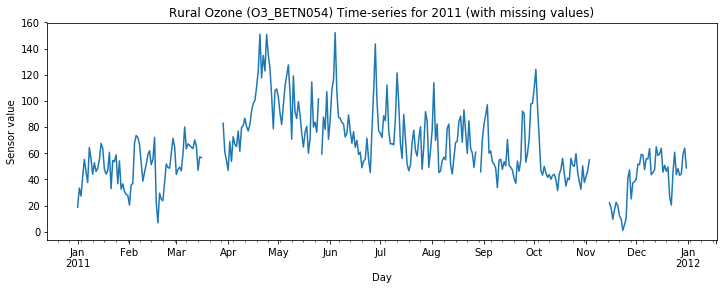

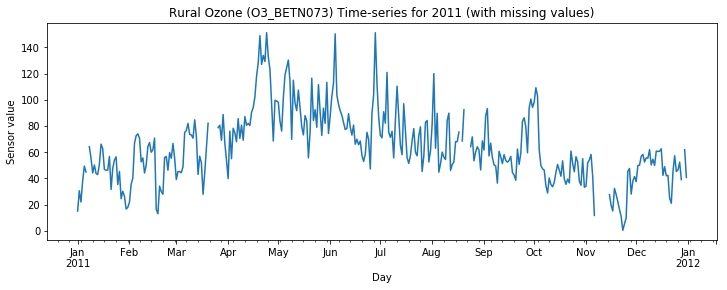

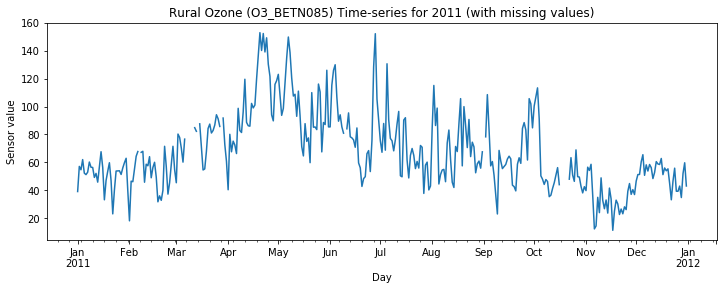

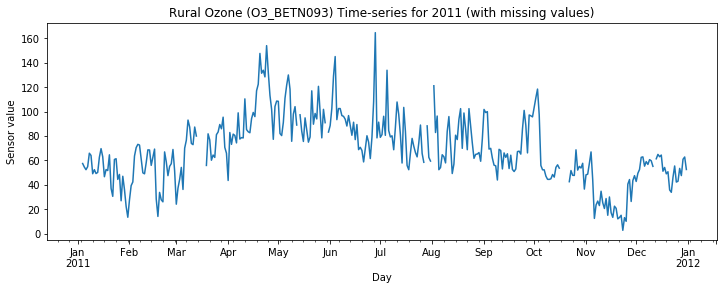

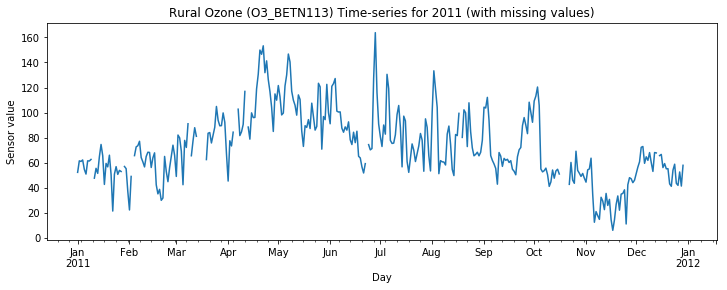

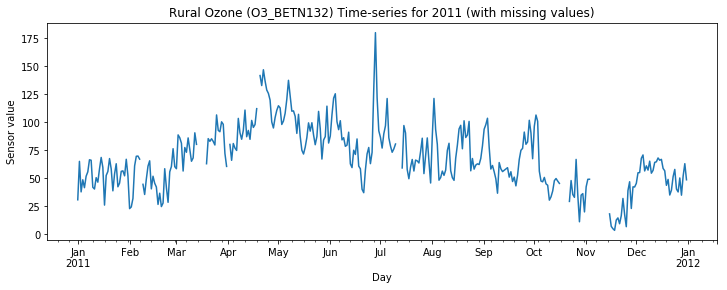

In [100]:
# Test plot stations
stationsToCheck = ['O3_BETN054','O3_BETN073', 'O3_BETN085', 'O3_BETN093', 'O3_BETN113', 'O3_BETN132']

for stationToCheck in stationsToCheck:
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Rural Ozone ({}) Time-series for 2011 (with missing values)'.format(stationToCheck))
    ax.grid(True)
    ts.tail(365)[stationToCheck].plot(ax = ax);

### On missing values get the reading from the closest station

Get station lon/lat coordinates:

In [101]:
# TODO: get station coordinates
import re, collections
from lxml import etree
import xml.etree.ElementTree as ET

tree = ET.parse('BE_meta.xml')
root = tree.getroot()

stationLonLat = {}
for child in root:    
    for child1 in child:          
        if child1.tag == "station":           
            if child1.attrib['Id'].startswith("BETN"):
                for child2 in child1:
                    if child2.tag == "station_info":
                        lon = 0.0
                        lat = 0.0
                        for child3 in child2:         
                            if child3.tag == "station_latitude_decimal_degrees":
                                lat = child3.text
                            if child3.tag == "station_longitude_decimal_degrees":
                                lon = child3.text                        
                        stationLonLat[child1.attrib['Id'][:7]] = (float(lon), float(lat))

stationsToDelete = []

for stationKey in stationLonLat.keys():
    if not "O3_" + stationKey in stationLabels:
        stationsToDelete.append(stationKey)

for stationToDelete in stationsToDelete:
    del stationLonLat[stationToDelete]
        

Store an ordered dictionary for the next closest station of the current:

In [102]:
import math
from collections import OrderedDict

def getDistanceDegrees(station1, station2):
    return math.sqrt((stationLonLat[station1][0] -stationLonLat[station2][0])**2 + (stationLonLat[station1][1] -stationLonLat[station2][1])**2)

distanceStationToStation = {}

for station1 in stationLonLat.keys():
    distancesToStation = {}
    for station2 in stationLonLat.keys():
        if station1 != station2:
            distancesToStation[station2] = getDistanceDegrees(station1, station2) 
    distanceStationToStation[station1] = OrderedDict(sorted(distancesToStation.items(), key=lambda t: t[1]))
    

Check if distances of a specific station are indeed ordered:

In [103]:
distanceStationToStation["BETN073"].keys()

odict_keys(['BETN054', 'BETN093', 'BETN063', 'BETN035', 'BETN100', 'BETN045', 'BETN121', 'BETN043', 'BETN046', 'BETN016', 'BETN113', 'BETN040', 'BETN041', 'BETN027', 'BETN132', 'BETN066', 'BETN085', 'BETN070', 'BETN051', 'BETN060', 'BETN052', 'BETN012', 'BETN029'])

In [104]:
distanceStationToStation["BETN073"]

OrderedDict([('BETN054', 0.2384026903392695),
             ('BETN093', 0.33611091541929794),
             ('BETN063', 0.3546874220408722),
             ('BETN035', 0.49818524525020036),
             ('BETN100', 0.5662376088401381),
             ('BETN045', 0.5790598361352652),
             ('BETN121', 0.6611531502488646),
             ('BETN043', 0.7152599506822706),
             ('BETN046', 0.7358755656250593),
             ('BETN016', 0.7516992290730412),
             ('BETN113', 0.7692773019737409),
             ('BETN040', 0.8080420200521764),
             ('BETN041', 0.808891318447666),
             ('BETN027', 0.883361144009631),
             ('BETN132', 1.0128481670363996),
             ('BETN066', 1.0216921377601973),
             ('BETN085', 1.0327408438374064),
             ('BETN070', 1.0493483102240166),
             ('BETN051', 1.0987734193931897),
             ('BETN060', 1.5337135617594964),
             ('BETN052', 1.6948762998416729),
             ('BETN012', 1.7912656

In [129]:
ts2 = ts.copy()
for dataRow in ts2.itertuples(index=True, name='Pandas'):
    date = dataRow[0]
    for stationLabel in stationLabels:
        if np.isnan(ts2.at[date, stationLabel]):  # If no value at station
            for closestStationLabel in distanceStationToStation[stationLabel[-7:]].keys():
                closestValue = ts.at[date, "O3_" + closestStationLabel]
                if not np.isnan(closestValue):
                    ts2.at[date, stationLabel] = closestValue
                    break  # Exit the loop    
ts = ts2                    

In [130]:
ts2.head(365)["O3_BETN054"].head(20)

1990-01-01    10.167
1990-01-02       NaN
1990-01-03       NaN
1990-01-04    12.714
1990-01-05    14.500
1990-01-06    23.143
1990-01-07    10.000
1990-01-08    20.625
1990-01-09    36.750
1990-01-10    54.571
1990-01-11    61.000
1990-01-12    41.000
1990-01-13    27.500
1990-01-14    23.500
1990-01-15    38.250
1990-01-16    64.875
1990-01-17    40.500
1990-01-18    23.250
1990-01-19    47.333
1990-01-20    34.167
Freq: D, Name: O3_BETN054, dtype: float64

Check if values indeed replaced:

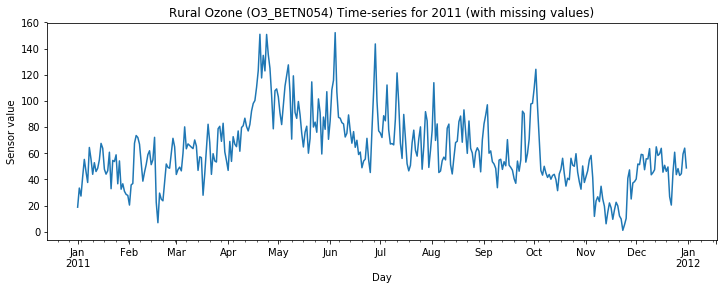

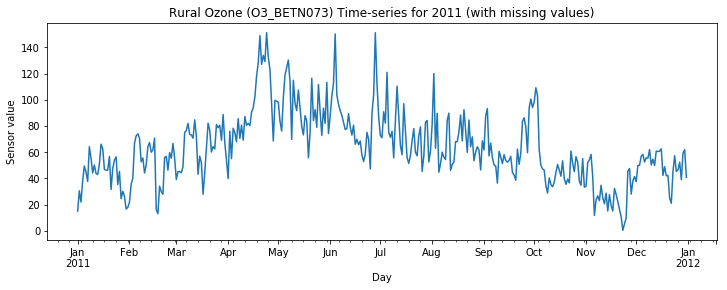

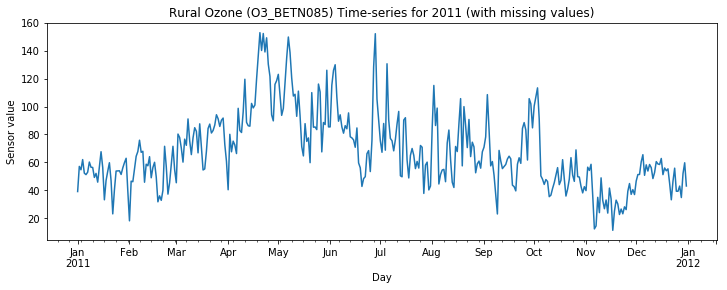

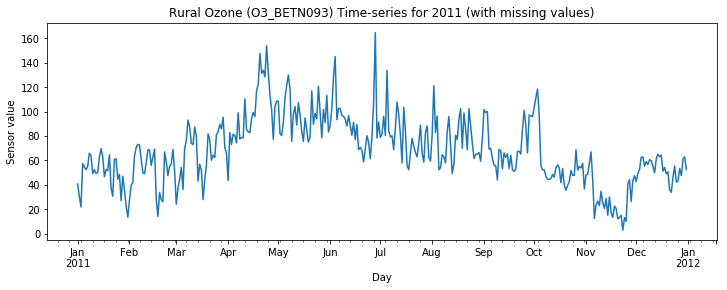

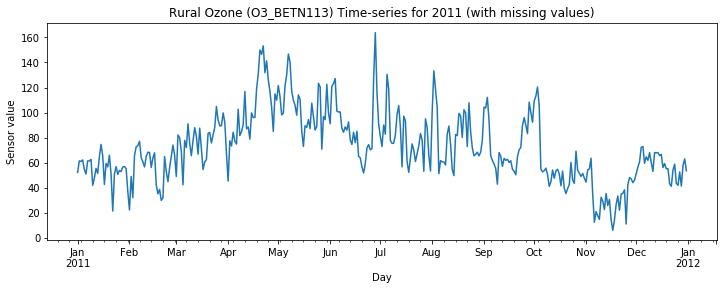

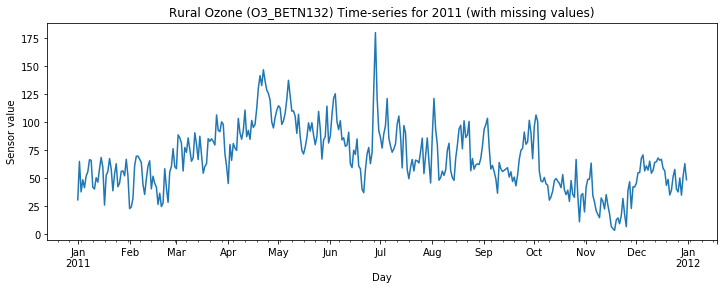

In [131]:
# Test plot stations
stationsToCheck = ['O3_BETN054','O3_BETN073', 'O3_BETN085', 'O3_BETN093', 'O3_BETN113', 'O3_BETN132']

for stationToCheck in stationsToCheck:
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Rural Ozone ({}) Time-series for 2011 (with missing values)'.format(stationToCheck))
    ax.grid(True)
    ts.tail(365)[stationToCheck].plot(ax = ax);

Adding weather data into the dataframe:

In [132]:
# Read geo-weather data
weatherData = genfromtxt('ECMWF\BETN073_51vars_19900101To2000101.csv', delimiter=',')

columns = len(weatherData[0])
row = -1
column = -1
addedColumns = len(stationLabels)

# Attach weather data
for dataRow in ts.itertuples(index=True, name='Pandas'):    
    date = dataRow[0]
    row += 1       
    if row < weatherData.shape[0] and column < weatherData.shape[1]:
        for column in range(columns):  
            ts.at[date, columnLabels[column + addedColumns]] = weatherData[row][column] # Set value to time-series        

In [133]:
# Read geo-weather data
weatherData = genfromtxt('ECMWF\BETN073_51vars_19900101To2000101.csv', delimiter=',')

# columns = len(weatherData[0])
row = -1
column = -1
# addedColumns = len(stationLabels)
O3lags = [0] * addedColumns

# Attach weather data
for dataRow in ts.itertuples(index=True, name='Pandas'):    
    date = dataRow[0]
    for i in range(len(stationLabels)):
        ts.at[date, stationLabels[i] + '-1'] = O3lags[i] # Get lag value
        O3lags[i] = ts.at[date, stationLabels[i]]  # Set next lag value

In [134]:
ts.head(6000).tail(5)["O3_BETN012"]

2006-06-01    87.571
2006-06-02    94.571
2006-06-03    89.286
2006-06-04    73.857
2006-06-05    90.125
Freq: D, Name: O3_BETN012, dtype: float64

In [135]:
ts.head(6000).tail(5)["O3_BETN132"]

2006-06-01     82.500
2006-06-02     73.167
2006-06-03    102.833
2006-06-04     90.833
2006-06-05     92.250
Freq: D, Name: O3_BETN132, dtype: float64

In [136]:
ts.head(6000).tail(5)["PARCS"]

2006-06-01    2992259.0
2006-06-02    2989572.0
2006-06-03    2991209.0
2006-06-04    2995731.0
2006-06-05    3003912.0
Freq: D, Name: PARCS, dtype: float64

In [137]:
ts.head(6000).tail(5)["FSR"]

2006-06-01    0.145950
2006-06-02    0.145946
2006-06-03    0.145947
2006-06-04    0.145946
2006-06-05    0.145949
Freq: D, Name: FSR, dtype: float64

Time-series plot of O3, first 365 days (1990, with missing data):

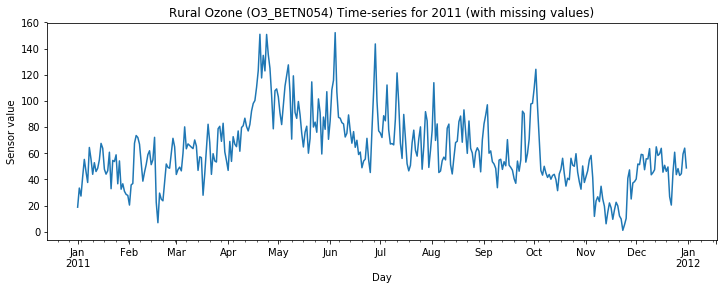

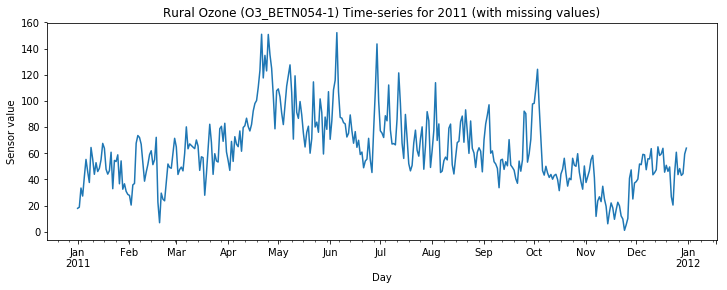

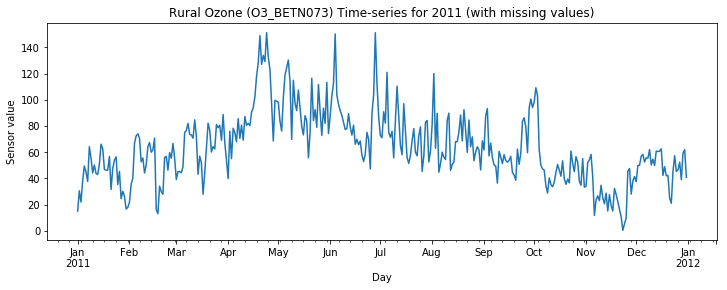

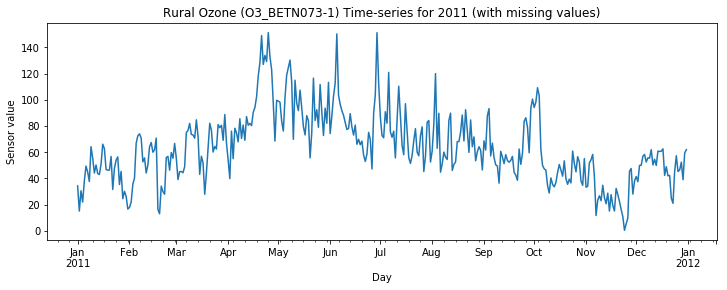

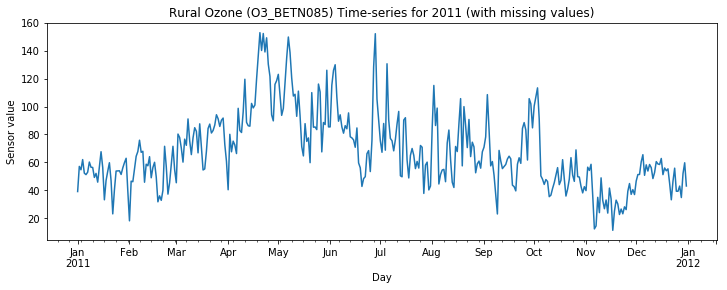

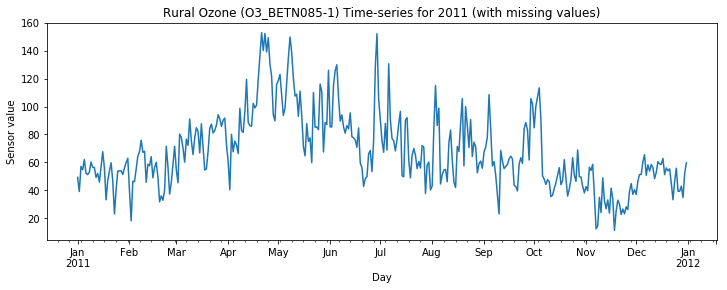

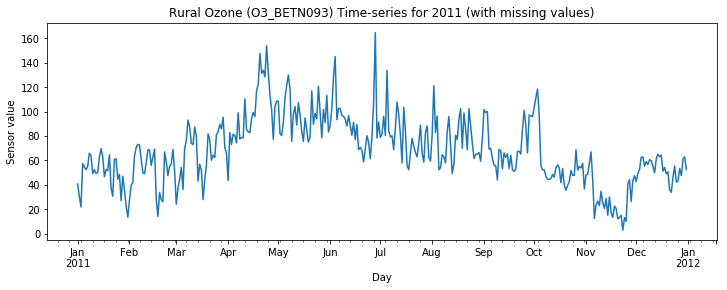

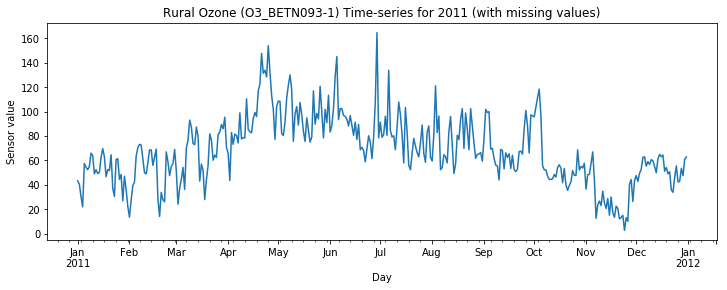

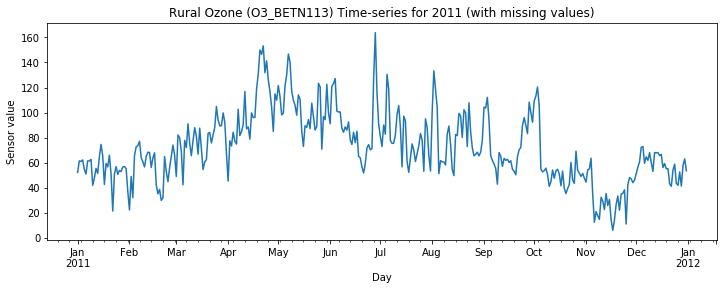

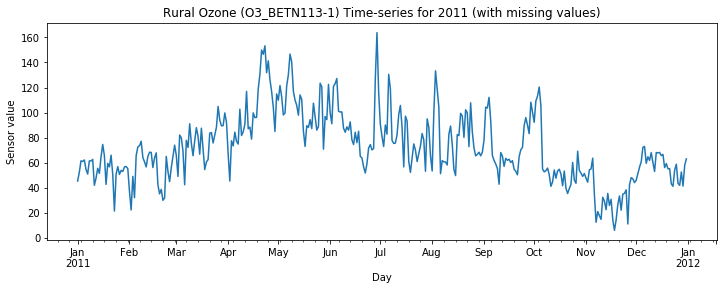

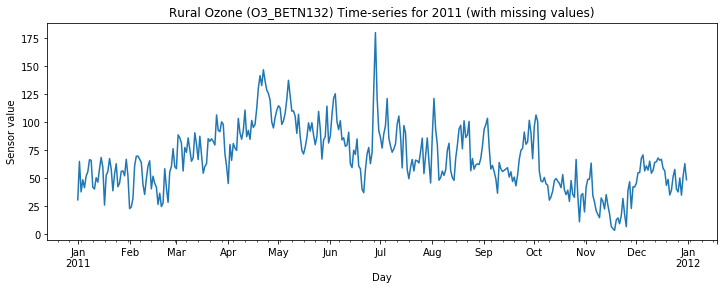

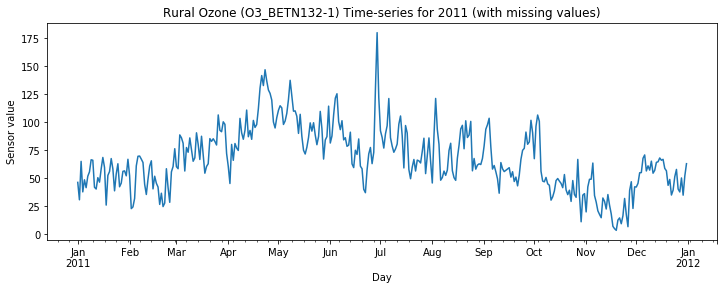

In [138]:
# Test plot stations and lags
stationsToCheck = ['O3_BETN054', 'O3_BETN073', 'O3_BETN085', 'O3_BETN093', 'O3_BETN113', 'O3_BETN132']

for stationToCheck in stationsToCheck:
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Rural Ozone ({}) Time-series for 2011 (with missing values)'.format(stationToCheck))
    ax.grid(True)
    ts.tail(365)[stationToCheck].plot(ax = ax);
    
    stationToCheckLag = stationToCheck + "-1"
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Rural Ozone ({}) Time-series for 2011 (with missing values)'.format(stationToCheckLag))
    ax.grid(True)
    ts.tail(365)[stationToCheckLag].plot(ax = ax);

Plot other time-series variables (Temperature 2m):

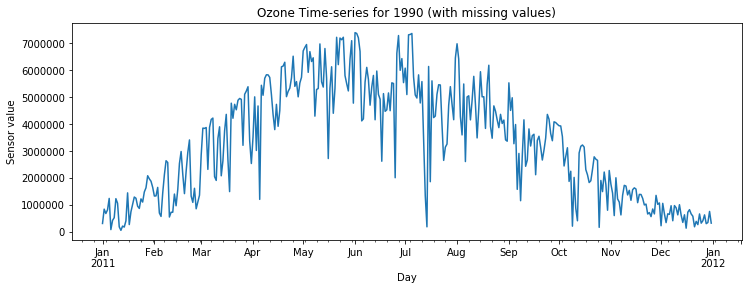

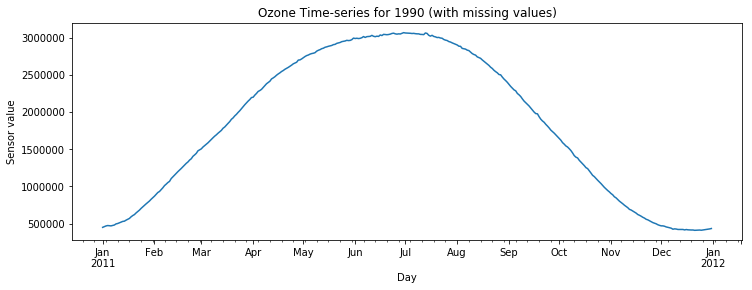

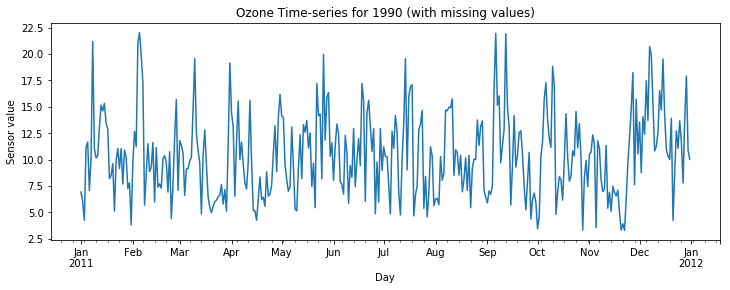

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for 1990 (with missing values)')
ax.grid(True)
# ts.tail(365)['2T'].plot(ax = ax);
# ['O3', '10FG', 'BLH', '10U', '2T', 'SSR', 'SUND', 'O3-1']
#['O3','PARCS','CI','RSN','SST','ISTL1','ISTL2','ISTL3','ISTL4','SWVL1','SWVL2','SWVL3','SWVL4','10FG','LSPF','CAPE','SP','W','STL1','SD','LSP','CP','SF','SSHF','MSL','BLH','TCC','10U','V','2T','2D','SSRD','STL2','STRD','SSR','TTR','E','STL3','LCC','MCC','HCC','SRC','MX2T','MN2T','RO','TCO3','TP','IEWS','SKT','STL4','FAL','FSR','O3-1']
ts.tail(365)['SSR'].plot(ax = ax);

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for 1990 (with missing values)')
ax.grid(True)
ts.tail(365)['PARCS'].plot(ax = ax);

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for 1990 (with missing values)')
ax.grid(True)
ts.tail(365)['10FG'].plot(ax = ax);

Lag variable (-1 day):

In [116]:
ts.tail(10)[stationLabels[0]]  

2011-12-22    30.000
2011-12-23    51.500
2011-12-24    59.250
2011-12-25    64.125
2011-12-26    62.375
2011-12-27    53.750
2011-12-28    51.750
2011-12-29    65.500
2011-12-30    68.250
2011-12-31    50.750
Freq: D, Name: O3_BETN012, dtype: float64

In [117]:
ts.tail(10)[stationLabels[0] + '-1']

2011-12-22    40.625
2011-12-23    30.000
2011-12-24    51.500
2011-12-25    59.250
2011-12-26    64.125
2011-12-27    62.375
2011-12-28    53.750
2011-12-29    51.750
2011-12-30    65.500
2011-12-31    68.250
Freq: D, Name: O3_BETN012-1, dtype: float64

In [118]:
ts.tail(10)[stationLabels[1]]

2011-12-22    14.688
2011-12-23    42.000
2011-12-24    63.000
2011-12-25    47.500
2011-12-26    47.500
2011-12-27    36.500
2011-12-28    44.875
2011-12-29    54.250
2011-12-30    65.000
2011-12-31    39.750
Freq: D, Name: O3_BETN016, dtype: float64

In [119]:
ts.tail(10)[stationLabels[1] + '-1']

2011-12-22    39.125
2011-12-23    14.688
2011-12-24    42.000
2011-12-25    63.000
2011-12-26    47.500
2011-12-27    47.500
2011-12-28    36.500
2011-12-29    44.875
2011-12-30    54.250
2011-12-31    65.000
Freq: D, Name: O3_BETN016-1, dtype: float64

In [120]:
ts.tail(10)[stationLabels[2]]

2011-12-22    15.375
2011-12-23    42.125
2011-12-24    64.125
2011-12-25    49.000
2011-12-26    49.375
2011-12-27    43.875
2011-12-28    45.125
2011-12-29    56.625
2011-12-30    64.125
2011-12-31    44.500
Freq: D, Name: O3_BETN027, dtype: float64

In [121]:
ts.tail(10)[stationLabels[2] + '-1']

2011-12-22    42.750
2011-12-23    15.375
2011-12-24    42.125
2011-12-25    64.125
2011-12-26    49.000
2011-12-27    49.375
2011-12-28    43.875
2011-12-29    45.125
2011-12-30    56.625
2011-12-31    64.125
Freq: D, Name: O3_BETN027-1, dtype: float64

In [122]:
ts.tail(10)[stationLabels[3]]

2011-12-22    37.125
2011-12-23    54.875
2011-12-24    62.625
2011-12-25    65.500
2011-12-26    64.125
2011-12-27    52.500
2011-12-28    58.500
2011-12-29    65.375
2011-12-30    69.500
2011-12-31    56.625
Freq: D, Name: O3_BETN029, dtype: float64

In [123]:
ts.tail(10)[stationLabels[3] + '-1']

2011-12-22    39.875
2011-12-23    37.125
2011-12-24    54.875
2011-12-25    62.625
2011-12-26    65.500
2011-12-27    64.125
2011-12-28    52.500
2011-12-29    58.500
2011-12-30    65.375
2011-12-31    69.500
Freq: D, Name: O3_BETN029-1, dtype: float64

Not useful interpolations: Cubic and Spline (order 2-5+) seem to have very high leverage, skewing the original data:

Useful interpolations: 'from_derivatives' (piecewise polynomial interpolation) and linear. (Probably) the most interesting interpolation: PCHIP 1-d monotonic cubic interpolation (see:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PchipInterpolator.html#scipy.interpolate.PchipInterpolator). Compared to the plain cubic interpolation, doesn't seem to skew the original data points. Pchip looks similar to the linear interpolation, with some extra smoothing.

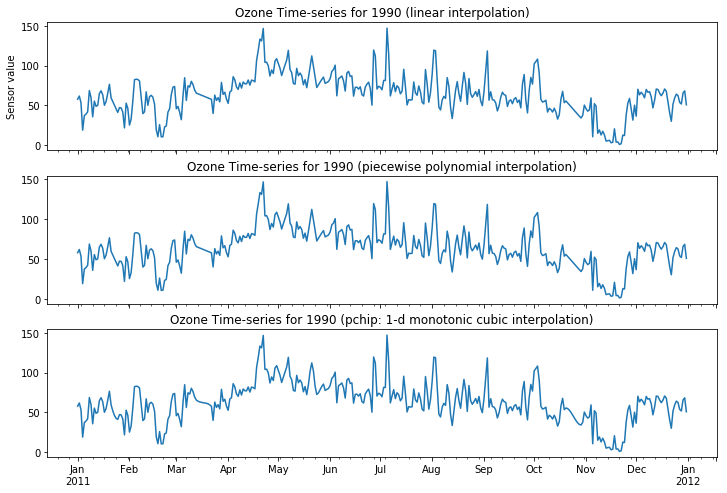

In [124]:
ts2a = ts.interpolate(method='linear',limit=20,limit_direction='both')
ts2b = ts.interpolate(method='from_derivatives',limit=20,limit_direction='both')
ts2c = ts.interpolate(method='pchip',limit=20,limit_direction='both')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
ax[0].set_ylabel('Sensor value')
ax[0].set_xlabel('Day')
ax[0].set_title('Ozone Time-series for 1990 (linear interpolation)')
ax[1].set_title('Ozone Time-series for 1990 (piecewise polynomial interpolation)')
ax[2].set_title('Ozone Time-series for 1990 (pchip: 1-d monotonic cubic interpolation)')
ts2a.tail(365)['O3_BETN012'].plot(ax = ax[0]);
ts2b.tail(365)['O3_BETN012'].plot(ax = ax[1]);
ts2c.tail(365)['O3_BETN012'].plot(ax = ax[2]);

In [125]:
ts_interpolated = ts.interpolate(method='linear',limit=360*40,limit_direction='both')
ts_interpolated.head(10)['O3_BETN066']

1990-01-01    31.333
1990-01-02    31.333
1990-01-03    31.333
1990-01-04    31.333
1990-01-05    31.333
1990-01-06    31.333
1990-01-07    31.333
1990-01-08    31.333
1990-01-09    31.333
1990-01-10    31.333
Freq: D, Name: O3_BETN066, dtype: float64

In [126]:
ts_interpolated.head(30)['O3_BETN012-1']

1990-01-01     0.000000
1990-01-02    10.167000
1990-01-03    10.139167
1990-01-04    10.111333
1990-01-05    10.083500
1990-01-06    10.055667
1990-01-07    10.027833
1990-01-08    10.000000
1990-01-09     8.437500
1990-01-10     6.875000
1990-01-11     9.333000
1990-01-12    10.667000
1990-01-13    16.167000
1990-01-14    21.667000
1990-01-15     2.500000
1990-01-16    18.000000
1990-01-17    24.533400
1990-01-18    31.066800
1990-01-19    37.600200
1990-01-20    44.133600
1990-01-21    50.667000
1990-01-22    42.125000
1990-01-23    33.750000
1990-01-24    55.375000
1990-01-25    56.625000
1990-01-26    62.857000
1990-01-27    63.833000
1990-01-28    55.500000
1990-01-29    57.500000
1990-01-30    52.857000
Freq: D, Name: O3_BETN012-1, dtype: float64

In [127]:
ts_interpolated.head(30)['O3_BETN012']

1990-01-01    10.167000
1990-01-02    10.139167
1990-01-03    10.111333
1990-01-04    10.083500
1990-01-05    10.055667
1990-01-06    10.027833
1990-01-07    10.000000
1990-01-08     8.437500
1990-01-09     6.875000
1990-01-10     9.333000
1990-01-11    10.667000
1990-01-12    16.167000
1990-01-13    21.667000
1990-01-14     2.500000
1990-01-15    18.000000
1990-01-16    24.533400
1990-01-17    31.066800
1990-01-18    37.600200
1990-01-19    44.133600
1990-01-20    50.667000
1990-01-21    42.125000
1990-01-22    33.750000
1990-01-23    55.375000
1990-01-24    56.625000
1990-01-25    62.857000
1990-01-26    63.833000
1990-01-27    55.500000
1990-01-28    57.500000
1990-01-29    52.857000
1990-01-30    44.500000
Freq: D, Name: O3_BETN012, dtype: float64

In [128]:
# Store to time-series csv
file_name = "2ALL_BETN_51vars_O3_O3-1_19900101To2000101.csv"
ts_interpolated.to_csv(file_name, sep=',', encoding='utf-8')